heightMap
 [[3 3 3 1 3 1 1 1 1 1 1 1]
 [1 3 3 2 3 3 1 1 2 2 3 2]
 [3 2 2 1 1 3 2 2 1 3 1 3]
 [3 2 1 3 2 1 3 2 3 3 1 1]
 [3 2 1 2 2 3 1 3 1 1 2 1]
 [1 1 2 2 3 2 3 1 2 3 2 2]
 [1 1 3 2 2 1 3 3 2 3 2 1]
 [1 2 3 2 1 2 1 3 3 3 3 2]
 [2 1 3 3 3 2 1 3 2 2 2 3]
 [2 2 1 2 2 1 1 1 2 3 1 3]] 

hCost
 [[0 0 2 2 2 0 0 0 0 0 0]
 [2 0 1 1 0 2 0 1 0 1 1]
 [1 0 1 0 2 1 0 1 2 2 2]
 [1 1 2 1 1 2 1 1 0 2 0]
 [1 1 1 0 1 2 2 2 0 1 1]
 [0 1 0 1 1 1 2 1 1 1 0]
 [0 2 1 0 1 2 0 1 1 1 1]
 [1 1 1 1 1 1 2 0 0 0 1]
 [1 2 0 0 1 1 2 1 0 0 1]
 [0 1 1 0 1 0 0 1 1 2 2]] 

vCost
 [[2 0 0 1 0 2 0 0 1 1 2 1]
 [2 1 1 1 2 0 1 1 1 1 2 1]
 [0 0 1 2 1 2 1 0 2 0 0 2]
 [0 0 0 1 0 2 2 1 2 2 1 0]
 [2 1 1 0 1 1 2 2 1 2 0 1]
 [0 0 1 0 1 1 0 2 0 0 0 1]
 [0 1 0 0 1 1 2 0 1 0 1 1]
 [1 1 0 1 2 0 0 0 1 1 1 1]
 [0 1 2 1 1 1 0 2 0 1 1 0]] 

mincost
 [[0. 2. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 1. 2. 1. 2. 1. 0. 1. 1. 2. 2. 0.]
 [0. 0. 2. 1. 2. 1. 0. 1. 1. 2. 0. 0.]
 [0. 0. 2. 1. 1. 1. 0. 2. 1. 2. 1. 0.]

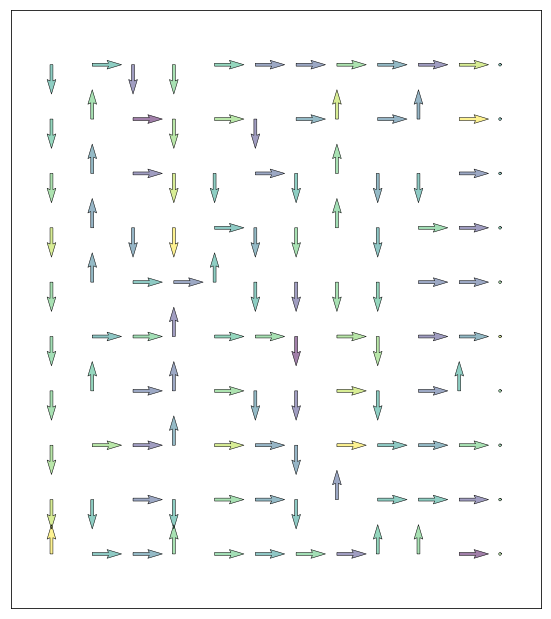

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g_diagnostics=False
HEIGHT=10
WIDTH=12

def upCost(rowNum, colNum, breakpoint, diagnostics=False):
    """Finds the cheapest path upwards (toward row 0)
    breakpoint is the point at which it will stop calculations (optimization)
    pulls from local vars:
    hCost
    mincost"""
    if rowNum is 0:
        return np.Infinity
    __hcost=np.flip(hCost[0:rowNum,colNum],0)
    __vcost=np.flip(vCost[0:rowNum,colNum],0)

    #assert both matrices are the same size
    assert (len(__hcost)==len(__vcost)), "Vertical cost and horizontal cost bug: not same size!"
    #create place to put answers. Default answer is infinity which means ignore.
    mat_upcost=np.ones(len(__vcost))*np.Infinity

    for i in np.arange(len(__vcost)):
        mat_upcost[i] = np.sum(__vcost[0:i+1])+__hcost[i]+mincost[rowNum,colNum]
        if(mat_upcost[i] > breakpoint):
            break
    if(diagnostics):
        print("=====upCost=====\n","rownum: %d, colNum: %d, breakpoint: %d" % (rowNum, colNum, breakpoint))
        print("__hcost\n",__hcost,"\n")
        print("__vcost\n",__vcost,"\n")
        print("min value of mat_upcost\n", np.ndarray.min(mat_upcost),"\n")
    return np.ndarray.min(mat_upcost)

def downCost(rowNum, colNum, breakpoint, diagnostics=False):
    """Finds the cheapest path upwards (toward row 0)
    breakpoint is the point at which it will stop calculations (optimization)
    pulls from local vars:
    hCost
    HEIGHT
    mincost"""
    if rowNum is HEIGHT-1:
        return np.Infinity
    __hcost=np.flip(hCost[rowNum+1:HEIGHT+1,colNum],0)
    __vcost=np.flip(vCost[rowNum:HEIGHT+1,colNum],0)

    #assert both matrices are the same size
    assert (len(__hcost)==len(__vcost)), "Vertical cost and horizontal cost bug: not same size!"
    #create place to put answers. Default answer is infinity which means ignore.
    mat_downcost=np.ones(len(__vcost))*np.Infinity

    for i in np.arange(len(__vcost)):
        mat_downcost[i] = np.sum(__vcost[0:i+1])+__hcost[i]+mincost[rowNum,colNum]
        if(mat_downcost[i] > breakpoint):
            break
    if(diagnostics):
        print("=====downCost=====\n","rownum: %d, colNum: %d, breakpoint: %d" % (rowNum, colNum, breakpoint))
        print("__hcost\n",__hcost,"\n")
        print("__vcost\n",__vcost,"\n")
        print("min value of mat_downcost\n", np.ndarray.min(mat_downcost),"\n")
    return np.ndarray.min(mat_downcost)



#generate random map
#heightMap = np.random.rand(HEIGHT,WIDTH)
heightMap=np.random.randint(1,4,((HEIGHT,WIDTH)))

#
hCost = np.abs(np.diff(heightMap))
vCost = np.abs(np.transpose(np.diff(np.transpose(heightMap))))

print("heightMap\n",heightMap,"\n")
print("hCost\n",hCost,"\n")
print("vCost\n",vCost,"\n")

mincost = np.zeros((HEIGHT,WIDTH))
direction = np.zeros((HEIGHT,WIDTH))
#1=up, 2=right, 3=down


for col in np.arange(WIDTH-2,-1,-1):
    for row in range(HEIGHT):
        #temp vars
        _directRightCost=mincost[row,col+1]+hCost[row,col]
        _upcost=upCost(row, col, _directRightCost, diagnostics=g_diagnostics)
        _downcost=downCost(row, col, _directRightCost, diagnostics=g_diagnostics)
        assert(_directRightCost is not None), "_directRightCost is None"
        assert(_upcost is not None), "_upcost is None"
        assert(_downcost is not None), "_downcost is None"
        if(g_diagnostics):
            print("cost results:\nRight: %s Up: %s Down: %s" % (str(_directRightCost),str(_upcost),str(_downcost)))
            print("==============\n==============\n")
        mincost[row,col]=np.ndarray.min(np.array([_directRightCost,_upcost,_downcost]))
        if(_upcost==mincost[row,col]):
            direction[row,col]=1
        if(_downcost==mincost[row,col]):
            direction[row,col]=3
        if(_directRightCost==mincost[row,col]): #put this last to prioritize
            direction[row,col]=2

print("mincost\n",mincost,"\n")
print("direction\n",direction,"\n")


#NOW LETS PLOT A VECTOR FIELD!
def DirectionCodeToComponent(code,axe=None):
    assert(axe is not None), "Invalid axis: None"
    if(axe=="x"):
        if(code==2):
            return 1
    if(axe=="y"):
        if(code==1):
            return 1
        if(code==3):
            return -1
    return 0


X, Y = np.mgrid[0:WIDTH, 0:HEIGHT]

#X is base X, Y is base Y
#U is x component, V is y component
translation=np.vectorize(DirectionCodeToComponent)
U, V = translation(np.flip(np.transpose(direction),1), axe="x"), translation(np.flip(np.transpose(direction),1), axe="y")

plt.axes()
plt.quiver(X, Y, U, V, R, alpha=.5) #inner color
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5) #border

plt.xlim(-1, WIDTH)
plt.xticks(())
plt.ylim(-1, HEIGHT)
plt.yticks(())

plt.gcf().set_size_inches(9.5,11)
#plt.show()

In [91]:
#TESTING: no official stuff below

HEIGHT=6
WIDTH=6

#generate random map
heightMap = np.random.rand(HEIGHT,WIDTH)
hCost = np.abs(np.diff(heightMap))
vCost = np.abs(np.transpose(np.diff(np.transpose(heightMap))))

print("heightMap\n",heightMap,"\n")
print("hCost\n",hCost,"\n")
print("vCost\n",vCost,"\n")


def upCost(rowNum, colNum, breakpoint, diagnostics=False):
    """Finds the cheapest path upwards (toward row 0)
    breakpoint is the point at which it will stop calculations (optimization)
    pulls from local vars:
    hCost"""
    if rowNum is 0:
        return np.Infinity
    __hcost=np.flip(hCost[0:rowNum,colNum],0)
    __vcost=np.flip(vCost[0:rowNum,colNum],0)

    #assert both matrices are the same size
    assert (len(__hcost)==len(__vcost)), "Vertical cost and horizontal cost bug: not same size!"
    #create place to put answers. Default answer is infinity which means ignore.
    mat_upcost=np.ones(len(__vcost))*np.Infinity

    for i in np.arange(len(__vcost)):
        mat_upcost_v = np.sum(__vcost[0:i+1]) #keep in memory temporarily
        mat_upcost[i] = mat_upcost_v+__hcost[i]
        if(mat_upcost_v > breakpoint):
            break
    if(diagnostics):
        print("__hcost\n",__hcost,"\n")
        print("__vcost\n",__vcost,"\n")
        print("min value of mat_upcost\n", np.ndarray.min(mat_upcost),"\n")
    return np.ndarray.min(mat_upcost)

def downCost(rowNum, colNum, breakpoint, diagnostics=False):
    """Finds the cheapest path upwards (toward row 0)
    breakpoint is the point at which it will stop calculations (optimization)
    pulls from local vars:
    hCost
    HEIGHT"""
    if rowNum is HEIGHT-1:
        return np.Infinity
    __hcost=np.flip(hCost[rowNum+1:HEIGHT+1,colNum],0)
    __vcost=np.flip(vCost[rowNum:HEIGHT+1,colNum],0)

    #assert both matrices are the same size
    assert (len(__hcost)==len(__vcost)), "Vertical cost and horizontal cost bug: not same size!"
    #create place to put answers. Default answer is infinity which means ignore.
    mat_downcost=np.ones(len(__vcost))*np.Infinity

    for i in np.arange(len(__vcost)):
        mat_downcost[i] = np.sum(__vcost[0:i+1])+__hcost[i]+mincost
        if(mat_downcost[i] > breakpoint):
            break
    if(diagnostics):
        print("__hcost\n",__hcost,"\n")
        print("__vcost\n",__vcost,"\n")
        print("min value of mat_downcost\n", np.ndarray.min(mat_downcost),"\n")
    return np.ndarray.min(mat_downcost)

downCost(4,4,1,diagnostics=True)



heightMap
 [[0.4093008  0.93229907 0.23748906 0.98110501 0.73713696 0.46350794]
 [0.8193829  0.56201533 0.44732896 0.49560693 0.65545026 0.54076605]
 [0.66544685 0.35695947 0.74558531 0.53565959 0.92669473 0.3755486 ]
 [0.7431072  0.1118249  0.85991023 0.00654568 0.31324913 0.67365979]
 [0.98629244 0.47030426 0.52496903 0.00592621 0.13056458 0.7807109 ]
 [0.63074568 0.22866312 0.15692347 0.18867077 0.38842325 0.16448612]] 

hCost
 [[0.52299827 0.69481001 0.74361594 0.24396804 0.27362902]
 [0.25736757 0.11468637 0.04827797 0.15984333 0.11468422]
 [0.30848738 0.38862584 0.20992572 0.39103514 0.55114613]
 [0.6312823  0.74808533 0.85336455 0.30670345 0.36041066]
 [0.51598818 0.05466477 0.51904281 0.12463837 0.65014632]
 [0.40208256 0.07173964 0.03174729 0.19975248 0.22393712]] 

vCost
 [[0.41008211 0.37028374 0.2098399  0.48549808 0.0816867  0.0772581 ]
 [0.15393605 0.20505586 0.29825635 0.04005267 0.27124447 0.16521744]
 [0.07766035 0.24513458 0.11432492 0.52911392 0.6134456  0.29811119]


0.4817957897542805

In [93]:
print(np.arange(9.0).reshape((3,3)))
print(np.arange(3.0))

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]
